In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def squash(x):
    # Any Any Any ..... Any ..... C
    x_norm = x.pow(2).sum(-1).sqrt().unsqueeze(-1)
    renorm_value = x_norm**2 / (1 + x_norm**2)
    return renorm_value * x / x_norm

![](1.png)

In [3]:
# 5 -> 3
c_in = torch.randn(5, 2)
c_out = torch.randn(3, 2)
W = torch.randn(5, 3, 2, 2)
b = torch.zeros(5, 3)

NUM_ITERATIONS = 10

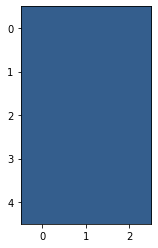

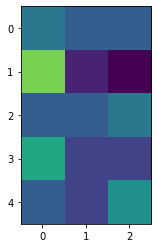

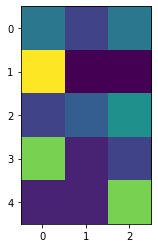

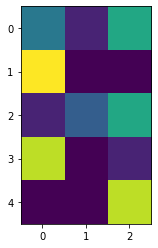

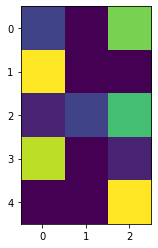

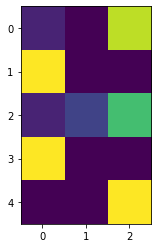

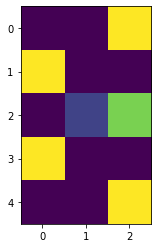

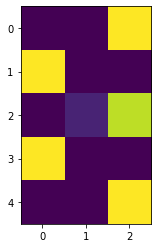

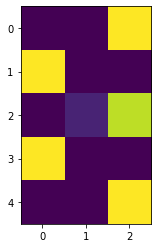

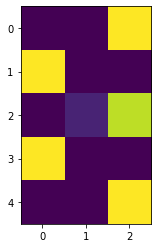

(tensor([[-7.3849e-01, -6.0064e-01],
         [-1.4857e-04, -1.1742e-03],
         [-8.9573e-01, -2.5881e-01]]), tensor([[ 10.4606,   1.1539,  17.8045],
         [ 25.0116,   0.1719, -24.1930],
         [ -2.9548,  -0.0822,   2.8127],
         [ 16.3759,   0.3878,  10.3020],
         [ -1.2781,  -0.7221,  10.0712]]))

In [24]:
# 5 -> 3
c_in = torch.randn(5, 2)
c_out = torch.randn(3, 2)
W = torch.randn(5, 3, 2, 2)

NUM_ITERATIONS = 10

c_out_prediction = torch.zeros(5, 3, 2)
c_out_prediction = (W @ c_in.unsqueeze(1).unsqueeze(-1)).reshape(5,3,2)

def dummy_func():
    b = torch.zeros(5, 3)

    for _ in range(NUM_ITERATIONS):
        importance = F.softmax(b, dim=-1)
        plt.imshow(importance.numpy().round(1), vmin=0, vmax=1)
        plt.show()
        c_out = (importance[:, :, None] * c_out_prediction).sum(0)
        c_out = squash(c_out)
        
        similarity = c_out_prediction @ c_out.T
        similarity = torch.diagonal(similarity, dim1=-1)

        b = b + similarity

    return c_out,b

dummy_func()